# Seaborn Library

**Seaborn** is a library for data visualization. Seaborn is a python library built on top of **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics, creates much more attractive plots than matplotlib, and is often more concise than matplotlib when we want to customize your plots, add colors, grids etc. It is closely integrated with pandas structures.

Here is some of the functionality that seaborn offers:

-  A dataset-oriented API for examining **relationships between multiple variables**
-  Specialized support for using **categorical** variables to show observations or aggregate statistics
-  Options for visualizing **univariate** or **bivariate** distributions and for comparing them between subsets of data
-  Automatic estimation and plotting of **linear regression** models for different kinds of **dependent** variables
-  Convinient views onto the overall structure of complex datasets
-  High level abstractions for structuring multi-plot grids that let us easily build complex visualizations
-  Concise control over matplotib figure styling with several built-in themes
-  Tools for choosing color palettes that faithfully reveal patterns in your data

Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's start with ***Univariate distribution***.

## Visualizing Univariate Distribution

We have already visualized univariate distributions before using boxplot, histograms etc. Let's now do that using seaborn. We'll use Sales data for the upcoming few exercises.

In [19]:
# set a seaborn style of your choice
sns.set_style('whitegrid')

# data
df = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/global_sales_data/market_fact.csv")

### Histograms and Density Plots

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

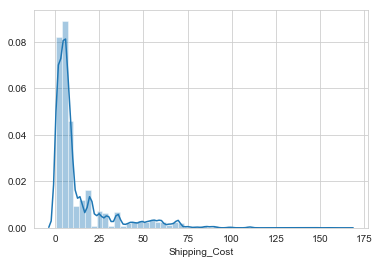

In [20]:
# simple density plot
sns.distplot(df['Shipping_Cost'])
plt.show()

The above graph is the **distribution of the Shipping_Cost** data, since it is a distributed plot, the output is in the form of **Probabilities**.
This plot creates a **density curve** which is ranging from 0 to 175 on the x-axis, but if we take a look at the y-axis this gives us the Probability term, ranging from 0 to 1.

In this particular example, we can see most of the values are falling in the lower range. Let's say from a POV of an e-commerce website like Amazon most of the items sold basically have a lower shipping cost. Some items will have higher shipping cost, assume if we order a refridgerator, the shipping cost for it will definitely be higher in comparision to if we buy a book.

So this tells us that the probability that we have lower shipping cost for a particular product is higher, but this also gives an insight of how the other distribution is looking like, we can see that there are products which are even outside this range with a lower count but higher shipping cost.

#### Rug plot
Another way to achieve the above but here the rug plot, plots the actual data points as small vertical bars. The rug plot is simply specified as an argument of the ```distplot()```

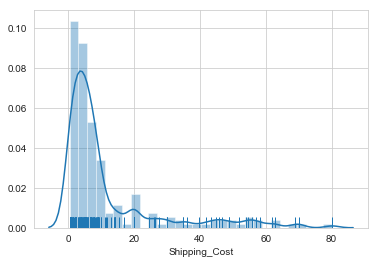

In [21]:
# rug = True
# Plotting only a few points since rug takes a long while to process all the data points

sns.distplot(df['Shipping_Cost'][:200], rug = True)
plt.show()

This rug plot gives us an insight that how much of the data is occuring in the zones, for every entry it plots a line, as we can see above most of the data is occuring in a range of 0 to 15. It basically tells us where the density of the data is too much or too low.

Simple density plot (without the histogram bars), if we only want to view the distribution curve, this can be created by specifying ```hist = False```

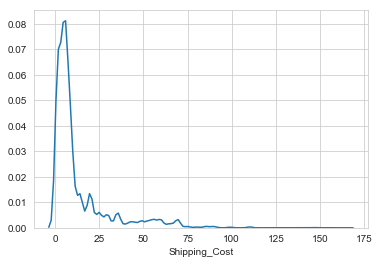

In [22]:
sns.distplot(df['Shipping_Cost'], hist = False)
plt.show()

Since ```seaborn``` uses ```matplotlib``` behind the scenes, the usual matplotlib functions work well with seaborn. For example, we can use subplots to plot multiple univariate distributions.

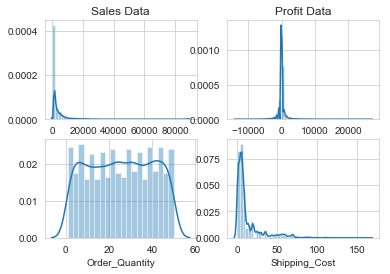

In [23]:
# Subplots with Seaborn and matplotlib

# Subplot 1
# plt.Figure(1) --auto initialized
plt.subplot(2, 2, 1)
sns.distplot(df['Sales'])
plt.title("Sales Data")

# Subplot 2
plt.subplot(2, 2, 2)
sns.distplot(df['Profit'])
plt.title("Profit Data")

# plt.Figure(2) --needs to be explicitly called in matplotlib but not in Seaborn.
# directly specify the plot no in the grid
# Subplot 3
#plt.figure(2)
plt.subplot(2, 2, 3)
sns.distplot(df['Order_Quantity'])


# Subplot 4
plt.subplot(2, 2, 4)
sns.distplot(df['Shipping_Cost'])

plt.show()

### Boxplots

Boxplots are a great way to visualize univariate data because they represent statistics such as the **Quartiles**, the **Inter-Quartile Range**, **Minimum and Maximum**, and possible **Outliers** within our data.

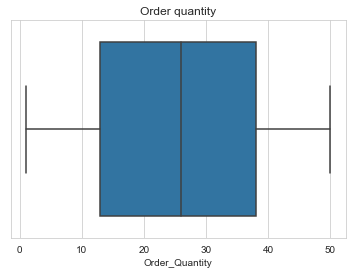

In [24]:
# Boxplot
sns.boxplot(df['Order_Quantity'])
plt.title("Order quantity")

plt.show()

The boxplot above is plotted on the horizontally on the x-axis, this is the default, but we need the boxplot to be displayed vertically on the y-axis, which is more a common standard, for this we have to specify the ```y = ``` parameter inside the ```sns.boxplot()``` function.

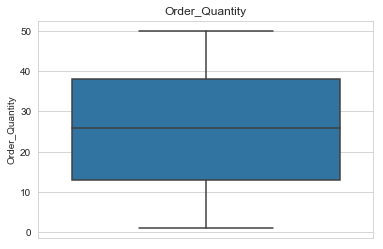

In [25]:
# to plot the values on the vertical axis, specify y = variable
sns.boxplot(y = df['Order_Quantity'])
plt.title("Order_Quantity")

plt.show()

## Visualizing Bi-variate Distribution

**Bi-variate distribution** are simply **two univariate distribution** plotted on x and y axes respectively. they help ypu observe the relationship between that two variables.

They are also called **Joint Distributions** and are created using ```sns.jointplot()```.

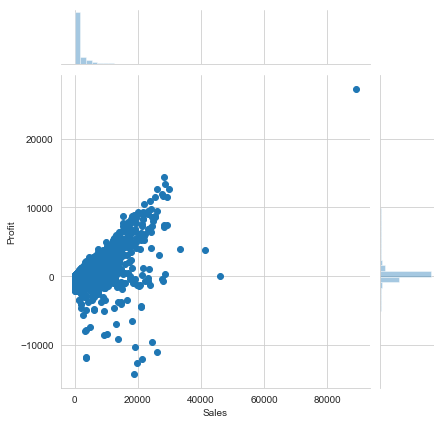

In [26]:
# Joint Distribution plots of Profit and Sales

sns.jointplot('Sales', 'Profit', df)
plt.show()

# Same as sns.jointplot(df['Sales'], df['Profit'])

Notice that both the distribution are heavily skewed and all the points seen to be concentrated in one region. This is because of some Outliers(extreme values) of Profits and Sales which matplotlib is trying to accomodate in the limited space of the plot.

Let's remove these extreme values and plot a new plot

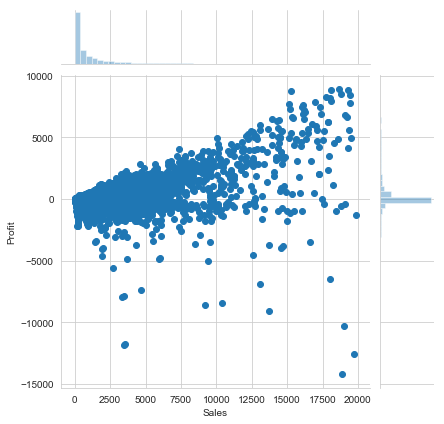

In [27]:
# remove values having extreme values
df = df[(df.Profit < 10000) & (df.Sales < 20000)]

sns.jointplot(df.Sales, df.Profit)  # --another method to call columns of a dataframe
# Same as sns.jointplot(df['Sales'], df['Profit'])
# Same as sns.jointplot('Sales', 'Profit', df)

plt.show()

We can adjust the arguments of the jointplot() to make the plot more readable. For e.g. specifying ```kind = hex``` will create a 'hexbin plot'.

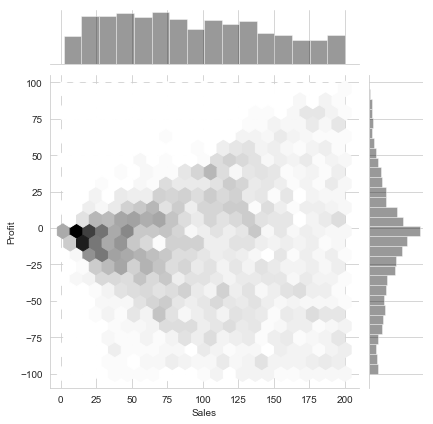

In [28]:
# Plotting low Sales value orders
# hex plot
df = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/global_sales_data/market_fact.csv")
df = df[(df.Profit < 100) & (df.Profit > -100) & (df.Sales < 200)]

sns.jointplot('Sales', 'Profit', df, kind = "hex", color = "k")
plt.show()

The bottom right region of the plot represents orders where the Series is high but the Profit is low, i.e. even when the store is getting high revenue, the orders are still making losses. These are the kind of orders a business would want to avoid.

We will see how to drill further down in the next section. For now, let's move to plotting pairwise relationships.

## Plotting Pair-Wise Relationships

We will find it helpful to plot pair-wise relationships between multiple numeric variables. For e.g. we have taken the prices of some popular cryptocurrencies such as Bitcoin, Ethereum, Monero, neo, quantum and ripple.

Now, the crypto enthusiasts would like to know that the prices of these curruncies vary with each other. If Bitcoin goes up, the others will likely follow suit etc.

Now, say you want to trade in some curruncies. Given a set of cryptocurrencies, how will you decide when and which one to buy/sell? It will be helpful to analyse past data and identify some trends in these currencies.

In [29]:
# Reading crypto-currency datafiles
btc = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/crypto_data/bitcoin_price.csv")
eth = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/crypto_data/ethereum_price.csv")
ltc = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/crypto_data/litecoin_price.csv")
mone = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/crypto_data/monero_price.csv")
neo = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/crypto_data/neo_price.csv")
qtum = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/crypto_data/qtum_price.csv")
ripl = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/crypto_data/ripple_price.csv")

# Putting a suffix with column names so that joins are easy
btc.columns = btc.columns.map(lambda x: str(x) + '_btc')
eth.columns = eth.columns.map(lambda x: str(x) + '_eth')
ltc.columns = ltc.columns.map(lambda x: str(x) + '_ltc')
mone.columns = mone.columns.map(lambda x: str(x) + '_mone')
neo.columns = neo.columns.map(lambda x: str(x) + '_neo')
qtum.columns = qtum.columns.map(lambda x: str(x) + '_qtum')
ripl.columns = ripl.columns.map(lambda x: str(x) + '_ripl')

btc.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [30]:
# merging all the files by date
m1 = pd.merge(btc, eth, how = "inner", left_on = "Date_btc", right_on = "Date_eth")
m2 = pd.merge(m1, ltc, how = "inner", left_on = "Date_btc", right_on = "Date_ltc")
m3 = pd.merge(m2, mone, how = "inner", left_on = "Date_btc", right_on = "Date_mone")
m4 = pd.merge(m3, neo, how = "inner", left_on = "Date_btc", right_on = "Date_neo")
m5 = pd.merge(m4, qtum, how = "inner", left_on = "Date_btc", right_on = "Date_qtum")
crypto = pd.merge(m5, ripl, how = "inner", left_on = "Date_btc", right_on = "Date_ripl")

crypto.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_eth,Open_eth,High_eth,...,Close_qtum,Volume_qtum,Market Cap_qtum,Date_ripl,Open_ripl,High_ripl,Low_ripl,Close_ripl,Volume_ripl,Market Cap_ripl
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000","Nov 07, 2017",298.57,304.84,...,11.21,"122,951,000","760,320,000","Nov 07, 2017",0.205103,0.211375,0.203978,0.210354,"114,073,000","7,902,920,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000","Nov 06, 2017",296.43,305.42,...,10.44,"116,937,000","745,802,000","Nov 06, 2017",0.201967,0.208662,0.201410,0.205990,"102,233,000","7,782,080,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000","Nov 05, 2017",300.04,301.37,...,10.13,"49,288,500","739,113,000","Nov 05, 2017",0.203274,0.205124,0.201117,0.202055,"46,959,000","7,832,450,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000","Nov 04, 2017",305.48,305.48,...,10.05,"35,477,100","759,110,000","Nov 04, 2017",0.208083,0.208479,0.202133,0.203750,"74,013,200","8,017,770,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000","Nov 03, 2017",288.50,308.31,...,10.38,"55,018,600","719,701,000","Nov 03, 2017",0.206205,0.228026,0.201728,0.208133,"373,402,000","7,945,410,000"


We have merged all the columns of all the dataframes into one dataframe called ```crypto```. As we can see our ```crypto``` dataframe contains a lot of columns, 49 columns to be exact. Now we will extract the columns we need by **Subsetting**.

In [31]:
# Subsetting only the cloning prices column for plotting
curr = crypto[["Close_btc", "Close_eth", "Close_ltc", "Close_mone", "Close_neo", "Close_qtum"]]
curr.head()

,Close_btc,Close_eth,Close_ltc,Close_mone,Close_neo,Close_qtum
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


```curr``` is a 6-dimensional dataframe. We can plot 2-D, 3-D graphs, It is not possible to visualize/represent a 6-D data/multi-dimensional data in a plot.

But, there is a technique called as **Pair-plot**. What pair-plot does is it will plot for every two possible combinations of columns of our dataframe ```curr```.

### Pair-wise Scatter Plots

Now, since we have multiple numeric variables, ```sns.pairlot()``` is a good choice to plot all of them in one figure.

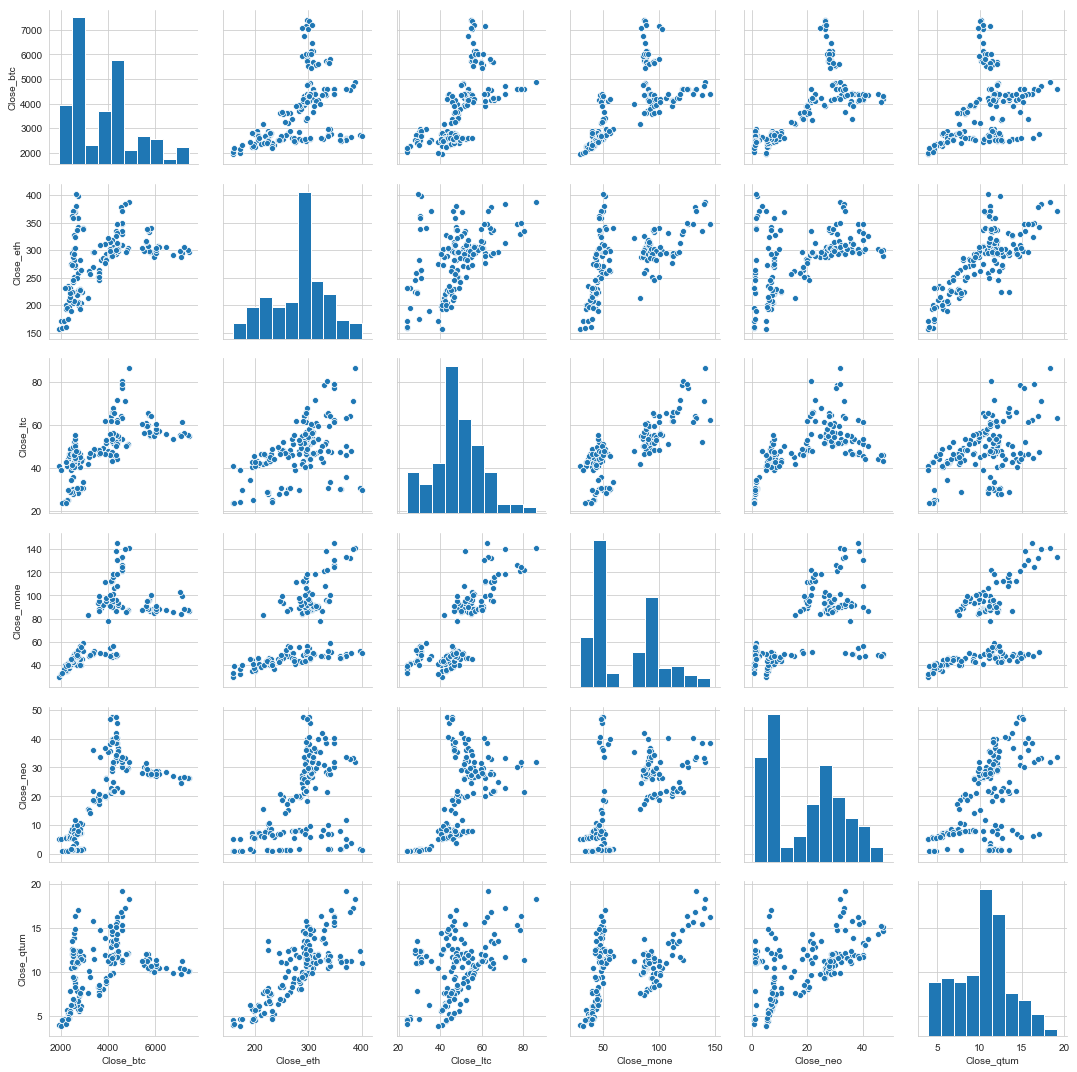

In [32]:
#Pair-plot
sns.pairplot(curr)
plt.show()

## Correlation

#### +ve and -ve Correlation

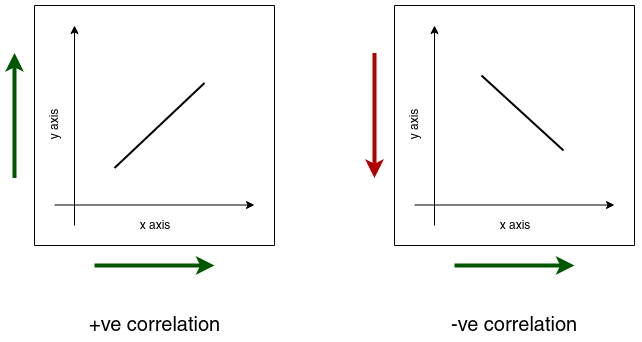

In the figure above, we see how the correlations between **data-points** can be observed, by looking at their plots.

- If in the plot the data-points are increasing in a **Linear** fashion, i.e. if variable on the y-axis is increasing with respect to x-axis which is also increasing, then we say that they are **Correlated**
- If in the plot the data-points are decreasing, or scattered, i.e. if the variable on the y-axis is decreasing with respect to x-axis which is increasing, then we say there is no correlation between the data-points.

In [33]:
# we can also observe the correlation between the currencies
# using df.corr()
co_rel = curr.corr()
round(co_rel, 3)

,Close_btc,Close_eth,Close_ltc,Close_mone,Close_neo,Close_qtum
Close_btc,1.000,0.449,0.658,0.697,0.735,0.382
Close_eth,0.449,1.000,0.490,0.539,0.482,0.791
Close_ltc,0.658,0.490,1.000,0.793,0.641,0.448
Close_mone,0.697,0.539,0.793,1.000,0.669,0.518
Close_neo,0.735,0.482,0.641,0.669,1.000,0.557
Close_qtum,0.382,0.791,0.448,0.518,0.557,1.000


The dataframe above is a **Correlation Matrix** of the crypto-currencies
We can see above, how the crypto-currencies are correlated with each other. The values above gives us how strong or weak the correlation is between the currencies, this value is measured between ```0``` and ```1```, **if the value is closer to ```1``` the correlation is strong (variables are correlated)** and **if the value is closer to ```0``` or negative then there is no correlation (variables are not correlated)**.

Notice that ```monero``` and ```litecoin``` are highly correlated (0.79).

### Heatmaps

Another way of visualizing **correlation matrix** itself is using ```sns.heatmap()``` function.

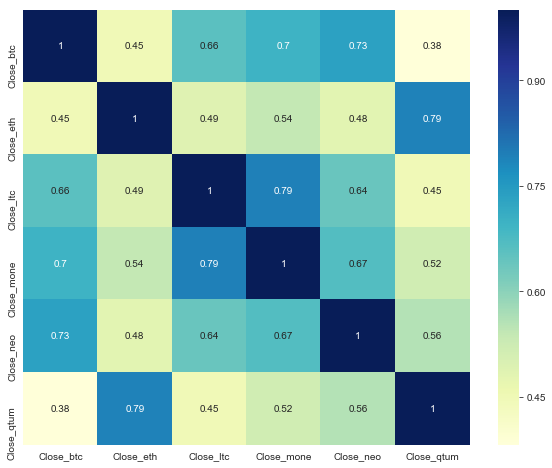

In [36]:
# figure size
plt.figure(figsize=(10,8))

# Heatmap
sns.heatmap(co_rel, cmap="YlGnBu", annot=True)
plt.show()

The boxes with a darker hue of blue, show the most correlated currencies. Specifically, **ethereum-quantum (0.79)** and **monero-litecoin (0.79)** are the most correlated pairs. Also, **bitcoin-neo (0.73)** are highly correlated.

This dataset contained limited amount of dimensions, so we could use these approach, But if our dataset is highly multidimensional, we cannot use this approach, we have to use some different technique.

#### Note
This cryptocurrency data is from a specific time period. This was used to explain visualization concepts and use-cases, you should not invest in these pairs of crypto-currencies. If you want to invest in these currencies please follow reliable sources to gain insight :-)